In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as ex
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import imblearn
from imblearn.over_sampling import SMOTE

In [2]:
dataset=pd.read_csv('BankChurner-1.csv')
dataset.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0              39  ...                       1                      3   
1              44  ...                       1                      2   
2              36  ...                       1                      0   
3              34  ...                       4                      1   
4              21  ...                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000  

[5 rows x 21 columns]

In [3]:
dataset.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [5]:
a,b=dataset.shape

In [6]:
print('Total No Of Rows:-',a)

Total No Of Rows:- 10127


In [7]:
print('Total No Of Columns:-',b)

Total No Of Columns:- 21


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [9]:
dataset.describe()

CLIENTNUM  Customer_Age  Dependent_count  Months_on_book  \
count  1.012700e+04  10127.000000     10127.000000    10127.000000   
mean   7.391776e+08     46.325960         2.346203       35.928409   
std    3.690378e+07      8.016814         1.298908        7.986416   
min    7.080821e+08     26.000000         0.000000       13.000000   
25%    7.130368e+08     41.000000         1.000000       31.000000   
50%    7.179264e+08     46.000000         2.000000       36.000000   
75%    7.731435e+08     52.000000         3.000000       40.000000   
max    8.283431e+08     73.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count              10127.000000            10127.000000   
mean                   3.812580                2.341167   
std                    1.554408                1.010622   
min                    1.000000                0.000000   
25%                    3.000000                2.000000   
50%                    4.000000                2.000000   
75%                    5.000000                3.000000   
max                    6.000000                6.000000   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
count           10127.000000  10127.000000         10127.000000   
mean                2.455317   8631.953698          1162.814061   
std                 1.106225   9088.776650           814.987335   
min                 0.000000   1438.300000             0.000000   
25%                 2.000000   2555.000000           359.000000   
50%                 2.000000   4549.000000          1276.000000   
75%                 3.000000  11067.500000          1784.000000   
max                 6.000000  34516.000000          2517.000000   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
count     10127.000000          10127.000000     10127.000000    10127.000000   
mean       7469.139637              0.759941      4404.086304       64.858695   
std        9090.685324              0.219207      3397.129254       23.472570   
min           3.000000              0.000000       510.000000       10.000000   
25%        1324.500000              0.631000      2155.500000       45.000000   
50%        3474.000000              0.736000      3899.000000       67.000000   
75%        9859.000000              0.859000      4741.000000       81.000000   
max       34516.000000              3.397000     18484.000000      139.000000   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
count         10127.000000           10127.000000  
mean              0.712222               0.274894  
std               0.238086               0.275691  
min               0.000000               0.000000  
25%               0.582000               0.023000  
50%               0.702000               0.176000  
75%               0.818000               0.503000  
max               3.714000               0.999000

In [10]:
dataset.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

# EDA

<AxesSubplot:xlabel='Customer_Age', ylabel='Attrition_Flag'>

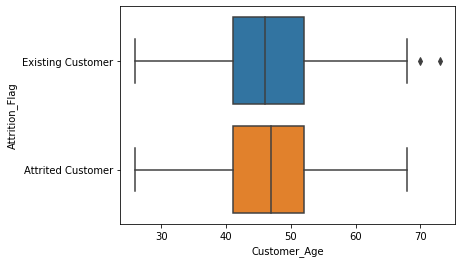

In [11]:
sns.boxplot(data=dataset,x=dataset['Customer_Age'],y=dataset['Attrition_Flag'])

In [12]:
set(dataset['Attrition_Flag'])

{'Attrited Customer', 'Existing Customer'}

In [13]:
df_attried=dataset.loc[dataset['Attrition_Flag']=='Attrited Customer']
df_attried

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
21     708508758  Attrited Customer            62      F                0   
39     708300483  Attrited Customer            66      F                0   
51     779471883  Attrited Customer            54      F                1   
54     714374133  Attrited Customer            56      M                2   
61     712030833  Attrited Customer            48      M                2   
...          ...                ...           ...    ...              ...   
10119  716893683  Attrited Customer            55      F                3   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
21           Graduate        Married  Less than $40K          Blue   
39          Doctorate        Married         Unknown          Blue   
51           Graduate        Married  Less than $40K          Blue   
54           Graduate        Married         $120K +          Blue   
61           Graduate        Married     $60K - $80K        Silver   
...               ...            ...             ...           ...   
10119      Uneducated         Single         Unknown          Blue   
10123         Unknown       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate        Unknown     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
21                 49  ...                       3                      3   
39                 56  ...                       4                      3   
51                 40  ...                       3                      1   
54                 36  ...                       3                      3   
61                 35  ...                       4                      4   
...               ...  ...                     ...                    ...   
10119              47  ...                       3                      3   
10123              25  ...                       2                      3   
10124              36  ...                       3                      4   
10125              36  ...                       3                      3   
10126              25  ...                       2                      4   

       Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
21           1438.3                    0           1438.3   
39           7882.0                  605           7277.0   
51           1438.3                  808            630.3   
54          15769.0                    0          15769.0   
61          34516.0                    0          34516.0   
...             ...                  ...              ...   
10119       14657.0                 2517          12140.0   
10123        4277.0                 2186           2091.0   
10124        5409.0                    0           5409.0   
10125        5281.0                    0           5281.0   
10126       10388.0                 1961           8427.0   

       Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
21                    1.047              692              16   
39                    1.052              704              16   
51                    0.997              705              19   
54                    1.041              602              15   
61                    0.763              691              15   
...                     ...              ...             ...   
10119                 0.166             6009              53   
10123                 0.804             8764              69   
10124  

In [14]:
ex.pie(df_attried,names='Gender',title='Propotion Of Gender Churning',hole=0.33)

In [15]:
df_exsit=dataset.loc[dataset['Attrition_Flag']=='Existing Customer']
df_exsit

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      768805383  Existing Customer            45      M                3   
1      818770008  Existing Customer            49      F                5   
2      713982108  Existing Customer            51      M                3   
3      769911858  Existing Customer            40      F                4   
4      709106358  Existing Customer            40      M                3   
...          ...                ...           ...    ...              ...   
10116  714109308  Existing Customer            46      M                5   
10117  712503408  Existing Customer            57      M                2   
10120  710841183  Existing Customer            54      M                1   
10121  713899383  Existing Customer            56      F                1   
10122  772366833  Existing Customer            50      M                2   

      Education_Level Marital_Status Income_Category Card_Category  \
0         High School        Married     $60K - $80K          Blue   
1            Graduate         Single  Less than $40K          Blue   
2            Graduate        Married    $80K - $120K          Blue   
3         High School        Unknown  Less than $40K          Blue   
4          Uneducated        Married     $60K - $80K          Blue   
...               ...            ...             ...           ...   
10116         College         Single    $80K - $120K          Blue   
10117        Graduate        Married    $80K - $120K          Blue   
10120     High School         Single     $60K - $80K          Blue   
10121        Graduate         Single  Less than $40K          Blue   
10122        Graduate         Single     $40K - $60K          Blue   

       Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                  39  ...                       1                      3   
1                  44  ...                       1                      2   
2                  36  ...                       1                      0   
3                  34  ...                       4                      1   
4                  21  ...                       1                      0   
...               ...  ...                     ...                    ...   
10116              36  ...                       2                      3   
10117              40  ...                       3                      4   
10120              34  ...                       2                      0   
10121              50  ...                       1                      4   
10122              40  ...                       2                      3   

       Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0           12691.0                  777          11914.0   
1            8256.0                  864           7392.0   
2            3418.0                    0           3418.0   
3            3313.0                 2517            796.0   
4            4716.0                    0           4716.0   
...             ...                  ...              ...   
10116       13187.0                 2241          10946.0   
10117       17925.0                 1909          16016.0   
10120       13940.0                 2109          11831.0   
10121        3688.0                  606           3082.0   
10122        4003.0                 1851           2152.0   

       Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0                     1.335             1144              42   
1                     1.541             1291              33   
2                     2.594             1887              20   
3                     1.405             1171              20   
4                     2.175              816              28   
...                     ...              ...             ...   
10116                 0.689            15354             112   
10117                 0.712            17498             111   
10120  

# Understanding wheather we can catogerize data with the age

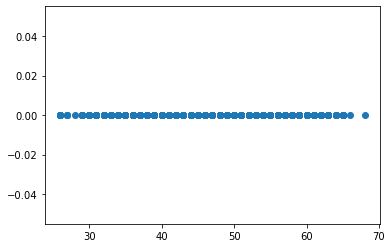

In [16]:
plt.plot(df_attried['Customer_Age'],np.zeros_like(df_attried['Customer_Age']),'o')
plt.show()

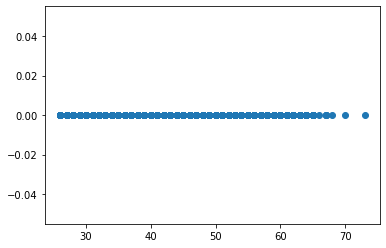

In [17]:
plt.plot(df_exsit['Customer_Age'],np.zeros_like(df_exsit['Customer_Age']),'o')
plt.show()

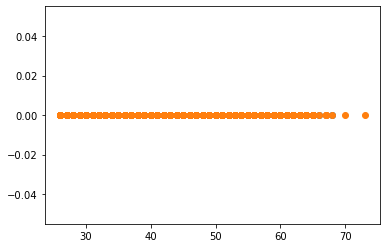

In [18]:
plt.plot(df_attried['Customer_Age'],np.zeros_like(df_attried['Customer_Age']),'o')
plt.plot(df_exsit['Customer_Age'],np.zeros_like(df_exsit['Customer_Age']),'o')
plt.show()

Here we can see the data is merged to one other so we canot classify our target varible with the age attribute

In [19]:
ex.pie(dataset,names='Education_Level',title='Propotion Of Education Levels',hole=0.33)

In [20]:
ex.pie(df_attried,names='Education_Level',title='Propotion Of Education Levels',hole=0.33)

# Basing on the income level choosing the attried customer

In [21]:
income_level=set(dataset['Income_Category'])
income_level

{'$120K +',
 '$40K - $60K',
 '$60K - $80K',
 '$80K - $120K',
 'Less than $40K',
 'Unknown'}

In [22]:
ex.pie(df_attried,names='Income_Category',title='Propotion of churning due to income',hole=0.33)

# Basing on the card type and income level <40 analyzing which customer are churning

In [23]:
set(dataset['Card_Category'])

{'Blue', 'Gold', 'Platinum', 'Silver'}

In [24]:
df_income=df_attried.loc[df_attried['Income_Category']=='Less than $40K']
df_income

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
21     708508758  Attrited Customer            62      F                0   
51     779471883  Attrited Customer            54      F                1   
140    789322833  Attrited Customer            48      F                5   
145    712950783  Attrited Customer            48      F                4   
198    708868233  Attrited Customer            68      M                0   
...          ...                ...           ...    ...              ...   
10064  718614183  Attrited Customer            43      F                4   
10089  720328983  Attrited Customer            52      F                5   
10105  709646433  Attrited Customer            59      F                1   
10124  716506083  Attrited Customer            44      F                1   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
21           Graduate        Married  Less than $40K          Blue   
51           Graduate        Married  Less than $40K          Blue   
140       High School        Married  Less than $40K          Blue   
145        Uneducated        Married  Less than $40K          Blue   
198       High School        Married  Less than $40K          Blue   
...               ...            ...             ...           ...   
10064     High School        Unknown  Less than $40K        Silver   
10089         Unknown        Married  Less than $40K          Blue   
10105     High School        Married  Less than $40K          Blue   
10124     High School        Married  Less than $40K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
21                 49  ...                       3                      3   
51                 40  ...                       3                      1   
140                38  ...                       3                      3   
145                38  ...                       2                      3   
198                52  ...                       3                      2   
...               ...  ...                     ...                    ...   
10064              31  ...                       2                      2   
10089              36  ...                       3                      3   
10105              50  ...                       4                      3   
10124              36  ...                       3                      4   
10126              25  ...                       2                      4   

       Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
21           1438.3                    0           1438.3   
51           1438.3                  808            630.3   
140          8025.0                    0           8025.0   
145          2732.0                    0           2732.0   
198          1438.3                  900            538.3   
...             ...                  ...              ...   
10064       13651.0                    0          13651.0   
10089        9611.0                    0           9611.0   
10105        5043.0                  743           4300.0   
10124        5409.0                    0           5409.0   
10126       10388.0                 1961           8427.0   

       Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
21                    1.047              692              16   
51                    0.997              705              19   
140                   0.654              673              18   
145                   0.760              739              16   
198                   0.743              760              21   
...                     ...              ...             ...   
10064                 1.046             9772              71   
10089                 0.840             7636              64   
10105  

In [25]:
ex.pie(df_attried,names='Card_Category',title='Propotion of churning due to income and card category',hole=0.33)

# Basing on the relation ship on the bank analyzing the condition

In [26]:
print('Min amount of relationship with bank:',min(df_attried['Months_on_book']))
print('Max amount of relation ship with bank:',max(df_attried['Months_on_book']))

Min amount of relationship with bank: 13
Max amount of relation ship with bank: 56


In [27]:
l1=[]
for i in df_attried['Months_on_book']:
    if i>10 and i<=20:
        l1.append(0)
    elif i>20 and i<=30:
        l1.append(1)
    elif i>30 and i<=40:
        l1.append(2)
    elif i>40 and i<=50:
        l1.append(3)
    elif i>50 and i<=60:
        l1.append(4)
m=l1.count(0)
m1=l1.count(1)
m2=l1.count(2)
m3=l1.count(3)
m4=l1.count(4)
d={'Less than 20':m,'Less than 30':m1,'Less than 40:':m2,'Less than 50:':m3,'Less than 60':m4}
d

{'Less than 20': 56,
 'Less than 30': 283,
 'Less than 40:': 886,
 'Less than 50:': 340,
 'Less than 60': 62}

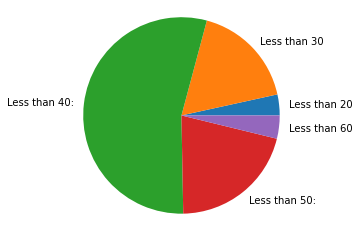

In [28]:
labels=[]
sizes=[]
for x,y in d.items():
    labels.append(x)
    sizes.append(y)
plt.pie(sizes, labels=labels)
plt.axis('equal')
plt.show()

# Analyzing on the products purchased from the bank

In [29]:
set(df_attried['Total_Relationship_Count'])

{1, 2, 3, 4, 5, 6}

In [30]:
m=len(df_attried['Total_Relationship_Count'].loc[df_attried['Total_Relationship_Count']==1])
m1=len(df_attried['Total_Relationship_Count'].loc[df_attried['Total_Relationship_Count']==2])
m2=len(df_attried['Total_Relationship_Count'].loc[df_attried['Total_Relationship_Count']==3])
m3=len(df_attried['Total_Relationship_Count'].loc[df_attried['Total_Relationship_Count']==4])
m4=len(df_attried['Total_Relationship_Count'].loc[df_attried['Total_Relationship_Count']==5])
m5=len(df_attried['Total_Relationship_Count'].loc[df_attried['Total_Relationship_Count']==6])
d1={'products_1':m,'products_2':m1,'products_3':m2,'products_4':m3,'products_5':m4,'products_6':m5}
d1

{'products_1': 233,
 'products_2': 346,
 'products_3': 400,
 'products_4': 225,
 'products_5': 227,
 'products_6': 196}

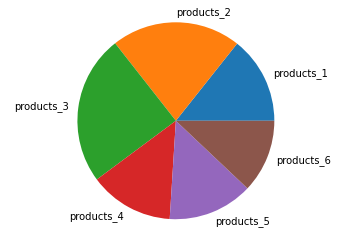

In [31]:
labels1=[]
sizes1=[]
for x1,y1 in d1.items():
    labels1.append(x1)
    sizes1.append(y1)
plt.pie(sizes1, labels=labels1)
plt.axis('equal')
plt.show()

# Analyzing the customer likely to churn

In [32]:
fig = make_subplots(rows=1, cols=1)

tr2=go.Histogram(x=df_attried['Months_Inactive_12_mon'],name='Months of inactive')

fig.add_trace(tr2,row=1,col=1)

fig.update_layout(height=700, width=1200, title_text="Distribution of the inactive months of (Last 12 months)")
fig.show()

In [33]:
fig = make_subplots(rows=1, cols=1)

tr2=go.Histogram(x=df_exsit['Months_Inactive_12_mon'],name='Months of inactive')

fig.add_trace(tr2,row=1,col=1)

fig.update_layout(height=700, width=1200, title_text="Distribution of the inactive months by exisiting of (Last 12 months)")
fig.show()

In [34]:
fig = make_subplots(rows=1, cols=1)

tr2=go.Histogram(x=df_attried['Total_Trans_Amt'],name='Total transaction')

fig.add_trace(tr2,row=1,col=1)

fig.update_layout(height=700, width=1200, title_text="Distribution of the transaction (Last 12 months)")
fig.show()

# Data Preprocessing

In [35]:
columns = [column for column in dataset.columns if dataset[column].dtype == 'object']
print(columns)

['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']


In [36]:
dataset['Attrition_Flag']=dataset['Attrition_Flag'].map({'Attrited Customer':1,'Existing Customer':0})
dataset['Gender']=dataset['Gender'].map({'M':0,'F':1})
dataset['Education_Level']=dataset['Education_Level'].map({'College':0,'Doctorate':1,'Graduate':2,'High School':3,'Post-Graduate':4,'Uneducated':5,'Unknown':6})
dataset['Income_Category']=dataset['Income_Category'].map({'Less than $40K':0,'$40K - $60K':1,'$60K - $80K':2,'80K - $120K':3,'$120K +':4,'Unknown':5})
dataset['Card_Category']=dataset['Card_Category'].map({'Blue':0,'Silver':1,'Gold':2,'Platinum':3})

In [37]:
dataset

CLIENTNUM  Attrition_Flag  Customer_Age  Gender  Dependent_count  \
0      768805383               0            45       0                3   
1      818770008               0            49       1                5   
2      713982108               0            51       0                3   
3      769911858               0            40       1                4   
4      709106358               0            40       0                3   
...          ...             ...           ...     ...              ...   
10122  772366833               0            50       0                2   
10123  710638233               1            41       0                2   
10124  716506083               1            44       1                1   
10125  717406983               1            30       0                2   
10126  714337233               1            43       1                2   

       Education_Level Marital_Status  Income_Category  Card_Category  \
0                    3        Married              2.0              0   
1                    2         Single              0.0              0   
2                    2        Married              NaN              0   
3                    3        Unknown              0.0              0   
4                    5        Married              2.0              0   
...                ...            ...              ...            ...   
10122                2         Single              1.0              0   
10123                6       Divorced              1.0              0   
10124                3        Married              0.0              0   
10125                2        Unknown              1.0              0   
10126                2        Married              0.0              1   

       Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                  39  ...                       1                      3   
1                  44  ...                       1                      2   
2                  36  ...                       1                      0   
3                  34  ...                       4                      1   
4                  21  ...                       1                      0   
...               ...  ...                     ...                    ...   
10122              40  ...                       2                      3   
10123              25  ...                       2                      3   
10124              36  ...                       3                      4   
10125              36  ...                       3                      3   
10126              25  ...                       2                      4   

       Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0           12691.0                  777          11914.0   
1            8256.0                  864           7392.0   
2            3418.0                    0           3418.0   
3            3313.0                 2517            796.0   
4            4716.0                    0           4716.0   
...             ...                  ...              ...   
10122        4003.0                 1851           2152.0   
10123        4277.0                 2186           2091.0   
10124        5409.0                    0           5409.0   
10125        5281.0                    0           5281.0   
10126       10388.0                 1961           8427.0   

       Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0                     1.335             1144              42   
1                     1.541             1291              33   
2                     2.594             1887              20   
3                     1.405             1171              20   
4                     2.175              816              28   
...                     ...              ...             ...   
10122                 0.703            15476             117   
10123                 0.804             8764              6

In [38]:
dataset[['Income_Category']]=dataset[['Income_Category']].fillna(3)

In [39]:
dataset.tail(30)

CLIENTNUM  Attrition_Flag  Customer_Age  Gender  Dependent_count  \
10097  801036033               0            31       0                0   
10098  716644008               1            55       0                3   
10099  709094358               0            51       1                1   
10100  719848008               0            39       0                2   
10101  718372458               0            42       0                2   
10102  720608658               0            33       1                1   
10103  717185658               1            51       0                1   
10104  715474083               0            51       0                3   
10105  709646433               1            59       1                1   
10106  717494358               0            58       1                0   
10107  713924283               1            61       0                0   
10108  714471183               1            47       0                4   
10109  780613758               0            47       0                5   
10110  718225683               0            56       0                1   
10111  710734308               0            49       0                1   
10112  708564858               1            33       0                2   
10113  713733633               1            27       0                0   
10114  720841533               0            29       0                0   
10115  712210458               0            38       0                1   
10116  714109308               0            46       0                5   
10117  712503408               0            57       0                2   
10118  713755458               1            50       0                1   
10119  716893683               1            55       1                3   
10120  710841183               0            54       0                1   
10121  713899383               0            56       1                1   
10122  772366833               0            50       0                2   
10123  710638233               1            41       0                2   
10124  716506083               1            44       1                1   
10125  717406983               1            30       0                2   
10126  714337233               1            43       1                2   

       Education_Level Marital_Status  Income_Category  Card_Category  \
10097                3         Single              1.0              0   
10098                2         Single              4.0              1   
10099                2         Single              0.0              0   
10100                2        Unknown              2.0              1   
10101                2        Unknown              1.0              0   
10102                5         Single              0.0              0   
10103                3        Married              3.0              0   
10104                2         Single              2.0              1   
10105                3        Married              0.0              0   
10106                2         Single              0.0              0   
10107                2         Single              2.0              0   
10108                2       Divorced              3.0              0   
10109                3         Single              0.0              0   
10110                2         Single              3.0              1   
10111                2         Single              2.0              0   
10112                0        Married              4.0              2   
10113                3       Divorced              2.0              0   
10114                2        Married              0.0              0   
10115                5         Single              1.0              0   
10116                0         Single              3.0              0   
10117                2        Married              3.0              0   
10118                6        Unknown              3.0              0   
10

In [40]:
dataset.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [41]:
dataset1=dataset

In [42]:
print(id(dataset1))
print(id(dataset))

2803338417104
2803338417104


In [43]:
dataset2=dataset1.drop(columns=['CLIENTNUM','Customer_Age','Marital_Status'])

In [44]:
dataset1.head()

CLIENTNUM  Attrition_Flag  Customer_Age  Gender  Dependent_count  \
0  768805383               0            45       0                3   
1  818770008               0            49       1                5   
2  713982108               0            51       0                3   
3  769911858               0            40       1                4   
4  709106358               0            40       0                3   

   Education_Level Marital_Status  Income_Category  Card_Category  \
0                3        Married              2.0              0   
1                2         Single              0.0              0   
2                2        Married              3.0              0   
3                3        Unknown              0.0              0   
4                5        Married              2.0              0   

   Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0              39  ...                       1                      3   
1              44  ...                       1                      2   
2              36  ...                       1                      0   
3              34  ...                       4                      1   
4              21  ...                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000  

[5 rows x 21 columns]

In [45]:
dataset2.head()

Attrition_Flag  Gender  Dependent_count  Education_Level  Income_Category  \
0               0       0                3                3              2.0   
1               0       1                5                2              0.0   
2               0       0                3                2              3.0   
3               0       1                4                3              0.0   
4               0       0                3                5              2.0   

   Card_Category  Months_on_book  Total_Relationship_Count  \
0              0              39                         5   
1              0              44                         6   
2              0              36                         4   
3              0              34                         3   
4              0              21                         5   

   Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
0                       1                      3       12691.0   
1                       1                      2        8256.0   
2                       1                      0        3418.0   
3                       4                      1        3313.0   
4                       1                      0        4716.0   

   Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0                  777          11914.0                 1.335   
1                  864           7392.0                 1.541   
2                    0           3418.0                 2.594   
3                 2517            796.0                 1.405   
4                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000

In [46]:
dataset2.shape

(10127, 18)

<AxesSubplot:>

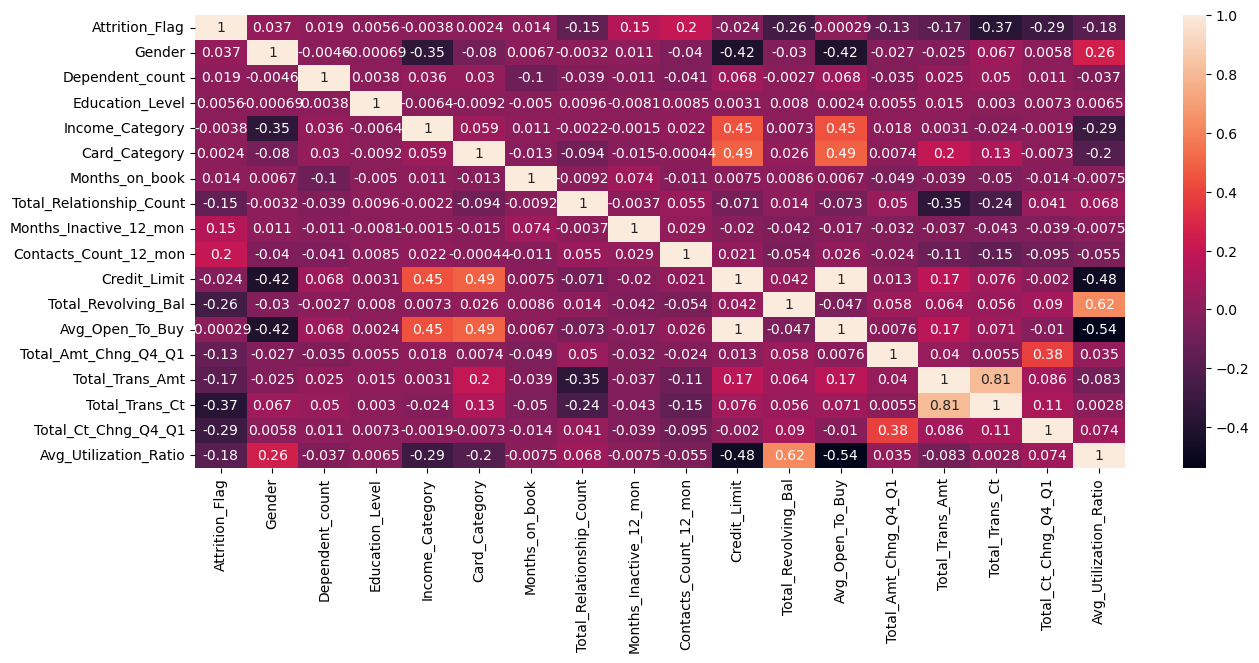

In [47]:
plt.figure(figsize=(15,6),dpi=100)
sns.heatmap(dataset2.corr(),annot=True)

In [48]:
import math
x=np.array(dataset2['Total_Relationship_Count'])
y=np.array(dataset2['Attrition_Flag'])
mx=np.mean(x)
my=np.mean(y)
lx=[]
for i in x:
    lx.append(i-mx)
ly=[]
for j in y:
    ly.append(j-my)
lx1=[]
ly1=[]
for i1 in lx:
    lx1.append(i1*i1)
for j1 in ly:
    ly1.append(j1*j1)
ssx=sum(lx1)
ssy=sum(ly1)
r=[]
for k in range(0,len(l1)):
    r.append(lx[k]*ly[k])
r1=sum(r)
result=r1/(math.sqrt(ssx)*math.sqrt(ssy))
result

-0.04477210356720881

# Sampling of our data

# Before Sampling

In [49]:
ex.pie(dataset,names='Attrition_Flag',hole=0.33)

In [50]:
oversample = SMOTE()
x, y = oversample.fit_resample(dataset2[dataset2.columns[1:]], dataset2[dataset2.columns[0]])
dataset3= x.assign(Churn = y)

In [51]:
x

Gender  Dependent_count  Education_Level  Income_Category  \
0           0                3                3         2.000000   
1           1                5                2         0.000000   
2           0                3                2         3.000000   
3           1                4                3         0.000000   
4           0                3                5         2.000000   
...       ...              ...              ...              ...   
16995       0                2                4         2.473820   
16996       0                4                3         4.455665   
16997       0                1                2         0.098619   
16998       0                4                0         1.059526   
16999       1                3                2         0.681282   

       Card_Category  Months_on_book  Total_Relationship_Count  \
0                  0              39                         5   
1                  0              44                         6   
2                  0              36                         4   
3                  0              34                         3   
4                  0              21                         5   
...              ...             ...                       ...   
16995              0              32                         2   
16996              1              36                         4   
16997              0              49                         5   
16998              0              32                         6   
16999              0              35                         3   

       Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
0                           1                      3  12691.000000   
1                           1                      2   8256.000000   
2                           1                      0   3418.000000   
3                           4                      1   3313.000000   
4                           1                      0   4716.000000   
...                       ...                    ...           ...   
16995                       2                      2   6363.459211   
16996                       3                      1  34516.000000   
16997                       4                      2   1438.300000   
16998                       2                      3   4382.643156   
16999                       3                      2   1438.300000   

       Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0                      777     11914.000000              1.335000   
1                      864      7392.000000              1.541000   
2                        0      3418.000000              2.594000   
3                     2517       796.000000              1.405000   
4                        0      4716.000000              2.175000   
...                    ...              ...                   ...   
16995                    0      6363.459211              0.782913   
16996                 2517     31999.000000              0.582618   
16997                    0      1438.300000              0.744256   
16998                    0      4382.643156              0.635381   
16999                    0      1438.300000              0.376997   

       Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1144              42             1.625000   
1                 1291              33             3.714000   
2                 1887              20             2.333000   
3                 1171              20             2.333000   
4                  816              28             2.500000   
...                ...             ...                  ...   
16995              739              14             0.379942   
16996             2456              46             0.655680   
16997             2588              48             0.666134   
16998             2393              45             0.490905   
16999             1986            

In [52]:
sample_data =dataset3[dataset3.columns[15:-1]].copy()
dataset4= dataset3.drop(columns=dataset3.columns[15:-1])

In [53]:
dataset4

Gender  Dependent_count  Education_Level  Income_Category  \
0           0                3                3         2.000000   
1           1                5                2         0.000000   
2           0                3                2         3.000000   
3           1                4                3         0.000000   
4           0                3                5         2.000000   
...       ...              ...              ...              ...   
16995       0                2                4         2.473820   
16996       0                4                3         4.455665   
16997       0                1                2         0.098619   
16998       0                4                0         1.059526   
16999       1                3                2         0.681282   

       Card_Category  Months_on_book  Total_Relationship_Count  \
0                  0              39                         5   
1                  0              44                         6   
2                  0              36                         4   
3                  0              34                         3   
4                  0              21                         5   
...              ...             ...                       ...   
16995              0              32                         2   
16996              1              36                         4   
16997              0              49                         5   
16998              0              32                         6   
16999              0              35                         3   

       Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
0                           1                      3  12691.000000   
1                           1                      2   8256.000000   
2                           1                      0   3418.000000   
3                           4                      1   3313.000000   
4                           1                      0   4716.000000   
...                       ...                    ...           ...   
16995                       2                      2   6363.459211   
16996                       3                      1  34516.000000   
16997                       4                      2   1438.300000   
16998                       2                      3   4382.643156   
16999                       3                      2   1438.300000   

       Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0                      777     11914.000000              1.335000   
1                      864      7392.000000              1.541000   
2                        0      3418.000000              2.594000   
3                     2517       796.000000              1.405000   
4                        0      4716.000000              2.175000   
...                    ...              ...                   ...   
16995                    0      6363.459211              0.782913   
16996                 2517     31999.000000              0.582618   
16997                    0      1438.300000              0.744256   
16998                    0      4382.643156              0.635381   
16999                    0      1438.300000              0.376997   

       Total_Trans_Amt  Total_Trans_Ct  Churn  
0                 1144              42      0  
1                 1291              33      0  
2                 1887              20      0  
3                 1171              20      0  
4                  816              28      0  
...                ...             ...    ...  
16995              739              14      1  
16996             2456              46      1  
16997             2588              48      1  
16998             2393              45      1  
16999             1986              48      1  

[17000 rows x 16 columns]

In [54]:
dataset4.shape

(17000, 16)

# After Sampling

In [55]:
ex.pie(dataset4,names='Churn',hole=0.33)

<AxesSubplot:>

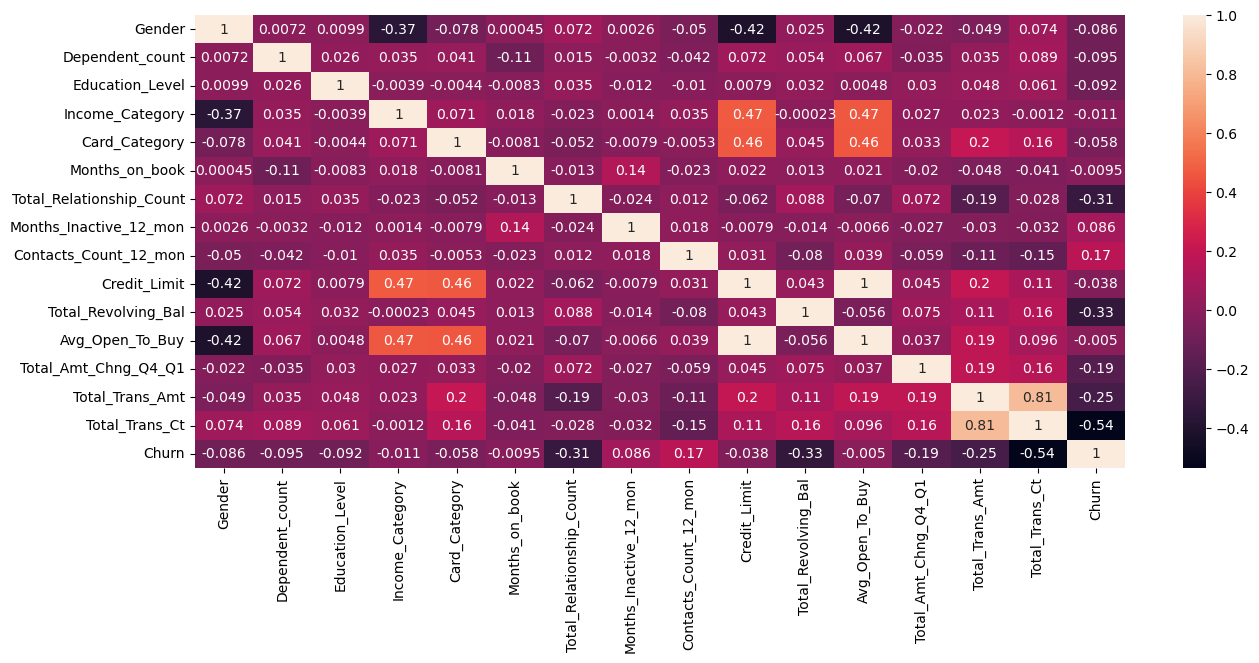

In [56]:
plt.figure(figsize=(15,6),dpi=100)
sns.heatmap(dataset4.corr(),annot=True)

In [57]:
dataset5=dataset4.drop(columns=['Total_Amt_Chng_Q4_Q1'])

In [58]:
y=dataset5['Churn']
x=dataset5.drop(columns=['Churn'])
y.shape

(17000,)

In [59]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [60]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
def find_best_model_using_gridsearchcv(x,y):
    algos = {
        'RandomForest' : {
            'model': RandomForestClassifier(),
            'params': {
                'n_estimators': [10,20,30]
            }
        },
        'LogisticRegression': {
            'model':LogisticRegression(),
            'params': {
                'solver': ['lbfgs','liblinear'],
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(x,y)

model  best_score                               best_params
0        RandomForest    0.967412                      {'n_estimators': 30}
1  LogisticRegression    0.864412                   {'solver': 'liblinear'}
2       decision_tree    0.756446  {'criterion': 'mse', 'splitter': 'best'}

In [61]:
from sklearn.ensemble import RandomForestClassifier
lr=RandomForestClassifier()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)

0.961764705882353

In [62]:
def test_data(Gender,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,
              Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,
              Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct):
    
    result=lr.predict([[Gender,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,
              Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,
              Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct]])
    if result==1:
        return 'Customer Churned'
    elif Months_Inactive_12_mon>=4:
        return 'Customer likely to churn'
    return 'Customer havent churned'

'''
Gender[0,1]
Dependent_count[0-5]
Education_Level[0-6]
Income_Category[0-5]
Card_Category[0-3]
Months_on_book[13-56]
Total_Relationship_Count[1-6]
Months_Inactive_12_mon[0-6]
Contacts_Count_12_mon[0-6]
Credit_Limit[1438-34516]
Total_Revolving_Bal[0-2517]
Avg_Open_To_Buy[3-34516]
Total_Trans_Amt[510-18484]
Total_Trans_Ct[10-139]
'''

'\nGender[0,1]\nDependent_count[0-5]\nEducation_Level[0-6]\nIncome_Category[0-5]\nCard_Category[0-3]\nMonths_on_book[13-56]\nTotal_Relationship_Count[1-6]\nMonths_Inactive_12_mon[0-6]\nContacts_Count_12_mon[0-6]\nCredit_Limit[1438-34516]\nTotal_Revolving_Bal[0-2517]\nAvg_Open_To_Buy[3-34516]\nTotal_Trans_Amt[510-18484]\nTotal_Trans_Ct[10-139]\n'

In [63]:
print(test_data(1,4,5,0.000000,0,36,4,1,4,2509.000000,1144,1365.000000,1804,38))

Customer havent churned


In [68]:
dataset4.to_csv('final.csv')